In [41]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
%matplotlib inline

In [42]:
data = pd.read_csv('Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/Ecommerce Customers')

In [43]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [44]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


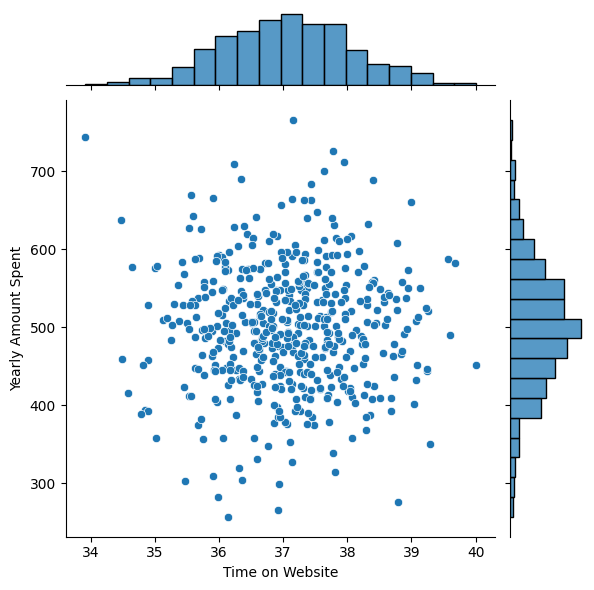

In [46]:
sns.jointplot(data=data,x='Time on Website', y='Yearly Amount Spent')

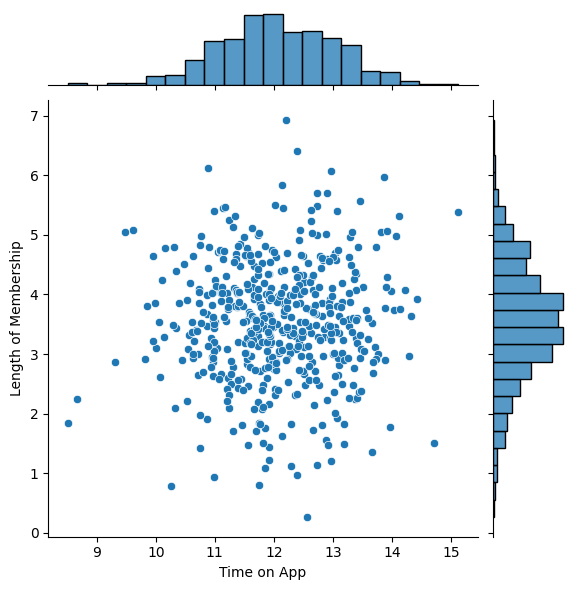

In [47]:
sns.jointplot(data=data, x='Time on App', y='Length of Membership')

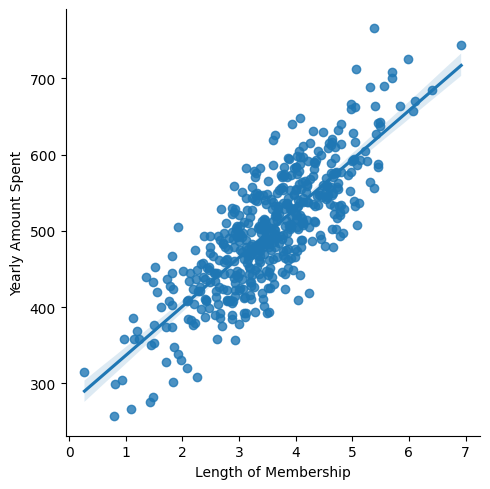

In [48]:
sns.lmplot(data=data,y='Yearly Amount Spent', x='Length of Membership')

In [49]:
X = data[['Time on App', 'Time on Website','Length of Membership']]
y = data['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [64]:
print("Coefficients of the model: ",lm.coef_)

Coefficients of the model:  [36.74667786  1.07348102 62.10453279]


In [65]:
predictions = lm.predict(X_test)

In [66]:
predictions

array([472.71626504, 432.20017147, 454.55525937, 583.3455678 ,
       609.83845501, 540.92154502, 596.72088269, 663.63489423,
       433.76535534, 563.16318431, 358.07391496, 479.31697497,
       567.01878368, 401.64337073, 726.4618377 , 556.94037801,
       657.76827694, 515.2032275 , 556.85761387, 589.45662286,
       490.99652284, 527.08103883, 421.17440542, 497.96571191,
       566.81830863, 402.30778607, 528.10733807, 388.94263062,
       538.90919939, 473.596613  , 603.15535005, 611.08923467,
       479.02292213, 533.29073973, 503.85906925, 548.18767691,
       449.97029802, 459.66983463, 408.39967606, 482.43632423,
       584.58789991, 480.15405362, 614.02812053, 522.2725112 ,
       459.38198314, 525.94931884, 539.30470604, 551.17475465,
       377.54651796, 493.65893525, 484.00129164, 517.43159056,
       261.46077827, 507.83244808, 507.53101003, 297.60890068,
       523.31376345, 398.91410032, 494.88187304, 421.14284528,
       550.84428353, 563.51008508, 711.64803364, 594.93

Text(0, 0.5, 'Y Test')

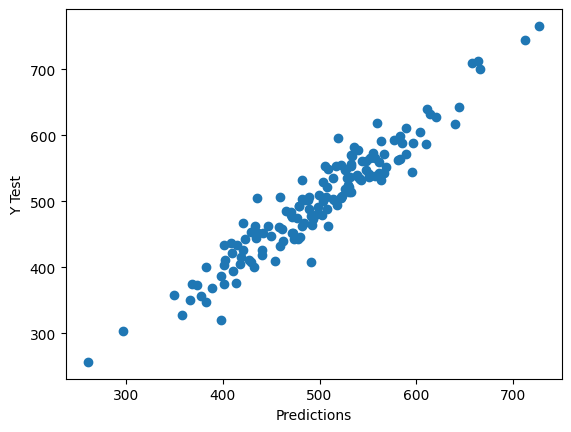

In [58]:
plt.scatter(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Y Test')

In [59]:
from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('MAE', metrics.mean_absolute_error(y_test,predictions))

RMSE 26.07918292966596
MSE 680.1237822789805
MAE 20.7203328847271


In [72]:
import joblib

In [73]:
joblib.dump(lm, 'model.joblib')

['model.joblib']